In [1]:
import scipy.io

In [2]:
import verif

In [3]:
import numpy as np

In [4]:
import datetime

In [5]:
import pandas as pd

In [6]:
import matplotlib.pyplot as plt

In [7]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)

In [8]:
%matplotlib inline

In [9]:
mat=scipy.io.loadmat('/mnt/pandora/Users_Critech/Thomas/__D_MATLAB_NEW/_DATA_4BREY_2TEST/ws_20161013_NOF_YOF_ALL.mat')

In [10]:
dat=mat['NOF_HF_T24x'][:]

In [11]:
k=14

In [12]:
num=dat[0,0][k][0,:]

In [13]:
num

array([        nan,         nan,         nan, ...,  0.78484686,
        9.24591497,  3.59878652])

In [14]:
mes=mat['Obs_00_12UTCx'][:]

In [15]:
obs=mes[k]

In [16]:
obs[:10]

array([ -9.  ,  -4.9 ,  11.78,   9.96,  -3.74,  -7.06, -12.08, -16.04,
       -13.16, -17.7 ])

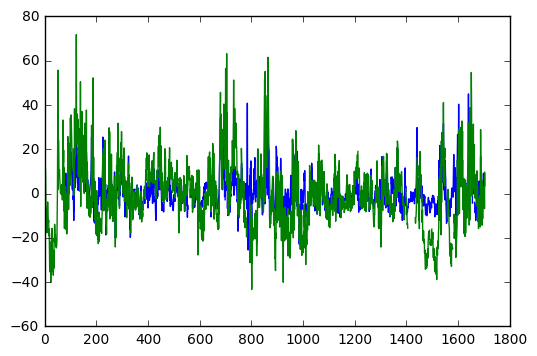

In [17]:
plt.plot(num)
plt.plot(obs)

In [18]:
offset=['24' for i in range(num.shape[0])]

In [19]:
## create dataframe for verif
dicv={'obs':obs, 'fcst':num, 'offset': offset}
comp=pd.DataFrame.from_dict(dicv)

In [20]:
comp.head()

,fcst,obs,offset
0,NaN,-9.00,24
1,NaN,-4.90,24
2,NaN,11.78,24
3,NaN,9.96,24
4,NaN,-3.74,24


In [21]:
sdate=datetime.datetime(2013,12,1,0)
edate=datetime.datetime(2016,3,31,12)

In [22]:
indx=pd.date_range(sdate, edate, freq='12H')

In [23]:
indx.shape

(1704,)

In [24]:
comp=comp.set_index(indx).dropna() # drop NAN values
comp.head()

,fcst,obs,offset
2014-01-06 00:00:00,7.902516,13.94,24
2014-01-06 12:00:00,6.848158,19.58,24
2014-01-07 00:00:00,-3.386787,-7.82,24
2014-01-07 12:00:00,0.271348,11.56,24
2014-01-08 00:00:00,-6.524829,-15.74,24


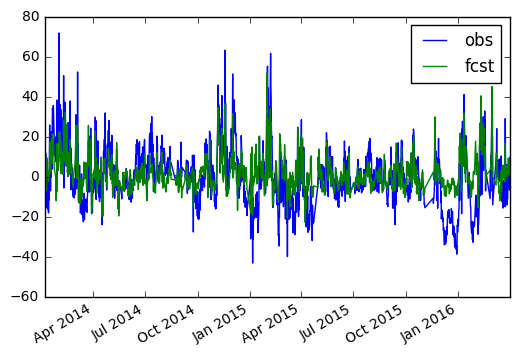

In [25]:
comp[['obs','fcst']].plot()

In [26]:
comp.to_csv('tmp/mat.csv',sep=' ', date_format='%Y%m%d', index_label='date')

In [27]:
vdat=verif.Data.Data('tmp/mat.csv')

In [28]:
pl=verif.Output.Taylor()

In [29]:
pl.setFigsize((10,8))

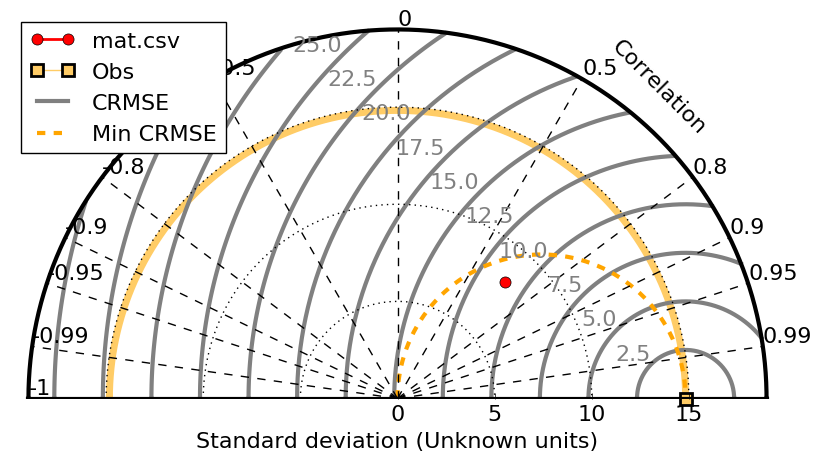

In [30]:
pl.plot(vdat)